In [ ]:
!pip install tensorflow==2.7.0

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version: "+tf.version.VERSION)

TensorFlow version: 2.7.0


# Les opérations basiques

In [2]:
# Définissez a et b, deux constantes égales à 2 et 3, respectivement
a = tf.constant(2)
print("a = %i" % a)

b = tf.constant(3)
print("b = %i" % b)

a = 2
b = 3


In [3]:
# Calculez c, la somme de a et b
c = a + b
print("a + b = %i" % c)

# Calculez d, le produit de a et b
d = a * b
print("a * b = %i" % d)

a + b = 5
a * b = 6


In [4]:
# Compatibilité entre Tensors et Numpy Arrays
print("Opérations entre Tensors et Numpy Arrays \n")

# Définissez a et b, un tensor et un array, respectivement (dimensions 2 x 2)
a = tf.constant([[2., 1.],
                 [1., 0.]], dtype=tf.float32)
print("Tensor: \n a = %s" % a)

b = np.array([[3., 0.],
              [5., 1.]], dtype=np.float32)
print("NumpyArray: \n b = %s" % b)

Opérations entre Tensors et Numpy Arrays 

Tensor: 
 a = tf.Tensor(
[[2. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)
NumpyArray: 
 b = [[3. 0.]
 [5. 1.]]


In [5]:
# Calculez c, la somme de a et b 
c = a + b
print("a + b = %s" % c)

# Calculez d, le produit de a et b
d = tf.matmul(a, b)
print("a * b = %s" % d)

a + b = tf.Tensor(
[[5. 1.]
 [6. 1.]], shape=(2, 2), dtype=float32)
a * b = tf.Tensor(
[[11.  1.]
 [ 3.  0.]], shape=(2, 2), dtype=float32)


In [6]:
# Itérez sur le tensor a (affichez tous ses élements individuelment)
print("Iterate through Tensor 'a':")
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i][j])

Iterate through Tensor 'a':
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


# Régression Linéaire

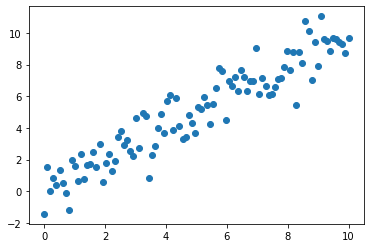

In [7]:
# Dataset d'entraînement
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)

# Nuage de points
plt.scatter(x_train, y_train)

In [8]:
# Learning rate
learning_rate = 0.01

# Nombre de loops
training_epochs = 100

# Déclarez les poids
weight = tf.Variable(0.)
bias = tf.Variable(0.)

In [9]:
# Définissez l'expression y de la régression linéaire
def linreg(x):
    y = weight*x + bias
    return y

In [10]:
# Définissez la "loss fonction" (MSE)
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [11]:
# Entraînez le modèle
for epoch in range(training_epochs):
    # Calculez la "loss function" dans le contexte Gradient Tape
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

        # Définissez le gradient
        gradients = tape.gradient(loss, [weight, bias])

        # Ajustez les poids
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)

        # Affichez la sortie
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

Epoch count 0: Loss value: 34.749996185302734
Epoch count 1: Loss value: 4.41059684753418
Epoch count 2: Loss value: 1.4015017747879028
Epoch count 3: Loss value: 1.1030560731887817
Epoch count 4: Loss value: 1.0734559297561646
Epoch count 5: Loss value: 1.0705201625823975
Epoch count 6: Loss value: 1.070228934288025
Epoch count 7: Loss value: 1.0702000856399536
Epoch count 8: Loss value: 1.0701971054077148
Epoch count 9: Loss value: 1.0701967477798462
Epoch count 10: Loss value: 1.0701968669891357
Epoch count 11: Loss value: 1.0701966285705566
Epoch count 12: Loss value: 1.0701966285705566
Epoch count 13: Loss value: 1.070196509361267
Epoch count 14: Loss value: 1.070196509361267
Epoch count 15: Loss value: 1.070196509361267
Epoch count 16: Loss value: 1.070196509361267
Epoch count 17: Loss value: 1.070196509361267
Epoch count 18: Loss value: 1.070196509361267
Epoch count 19: Loss value: 1.070196509361267
Epoch count 20: Loss value: 1.070196509361267
Epoch count 21: Loss value: 1.0701

In [12]:
# Affichez les paramètres du modèle (weight et bias)
print(weight.numpy())
print(bias.numpy())

0.9803421
0.14894138


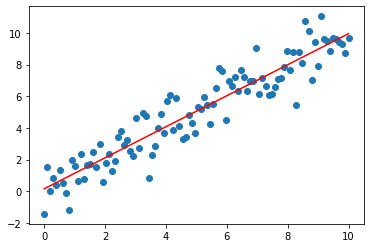

In [13]:
# Nuage de points + droite de la régression
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()

# Régression logistique

In [14]:
# On télécharge les données MNIST
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
# Les paramètres des données MNIST
num_classes = 10 # total classes
num_features = 784 # data features

# Les paramètres d'entraînement
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [16]:
# Conversion en float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# On applati les images dans un vector 1-D, avec 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Normalisation des images: [0, 255] -> [0, 1]
x_train, x_test = x_train / 255., x_test / 255.

# Utilisez tf.data API pour "shuffle" et "batch" les données
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [17]:
# Création du poids avec dimensions [784, 10] (28*28 features des images et le nombre classes)
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")

# Le biais, format [10] (nombre de classes)
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# Régression logistique (Wx + b).
def logistic_regression(x):
    # Utilisez softmax pour normalizer les logits en distribution de probas.
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encoder les labels via "one hot encoder"
    y_true = tf.one_hot(y_true, depth=num_classes)
    
    # On limite les valeurs pour éviter l'erreur log(0)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    
    # On calcule la cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy
def accuracy(y_pred, y_true):
    # La prédiction est l'index avec le score le plus élevé dans le vector de prédictions (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [18]:
# Optimizer : Stochastic gradient descent
optimizer = tf.optimizers.SGD(learning_rate)

# Processus d'optimisation 
def run_optimization(x, y):
    # Faites les calculs dans un GradientTape pour une différenciation automatique
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
    
    # Calculez les gradients
    gradients = g.gradient(loss, [W, b])
    
    # Mettez W et b à jour, en utilisant les gradients
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [19]:
# Lancez le training pour un nombre donné de steps
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Lancez l'optimisation pour mettre à jour W et b
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 516.399780, accuracy: 0.804688
step: 100, loss: 748.510193, accuracy: 0.792969
step: 150, loss: 515.389954, accuracy: 0.855469
step: 200, loss: 618.235596, accuracy: 0.824219
step: 250, loss: 536.390869, accuracy: 0.835938
step: 300, loss: 610.191833, accuracy: 0.800781
step: 350, loss: 577.718567, accuracy: 0.835938
step: 400, loss: 556.474426, accuracy: 0.824219
step: 450, loss: 574.414673, accuracy: 0.855469
step: 500, loss: 632.517029, accuracy: 0.843750
step: 550, loss: 714.396667, accuracy: 0.777344
step: 600, loss: 872.124512, accuracy: 0.687500
step: 650, loss: 637.478210, accuracy: 0.808594
step: 700, loss: 473.835632, accuracy: 0.867188
step: 750, loss: 624.010742, accuracy: 0.816406
step: 800, loss: 708.428589, accuracy: 0.847656
step: 850, loss: 649.924561, accuracy: 0.816406
step: 900, loss: 555.671204, accuracy: 0.851562
step: 950, loss: 485.851746, accuracy: 0.855469
step: 1000, loss: 551.147766, accuracy: 0.867188


In [21]:
# Testez le modèle sur le test set
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.806300


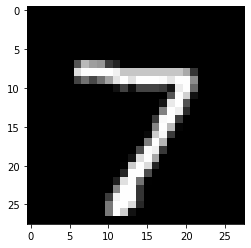

Model prediction: 7


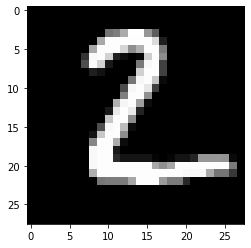

Model prediction: 2


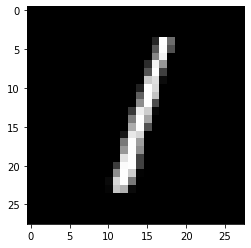

Model prediction: 1


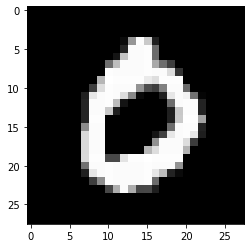

Model prediction: 6


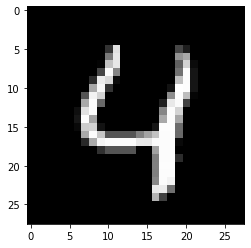

Model prediction: 4


In [23]:
# Appliquez le modèle sur 5 images du test set
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# Affichez l'image et la prédiction
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

# Réseau de neuronnes v1

D'abord, nous créons des données aléatoires. x est 1-D tensor, et le modèle doit prédire une valeur y.

In [ ]:
x = tf.###([[1.,2.]])
y = 5

Les paramètres sont initisialisés avec une distribution normale, de moyenne 0 et variance 1

In [ ]:
def initalize_parameters(size, variance=1.0):
    return tf.###((tf.random.normal(size) * variance))

first_layer_output_size = 3

weights_1 = initalize_parameters((x.shape[1], first_layer_output_size))
bias_1 = initalize_parameters([1])


weights_2 = initalize_parameters((first_layer_output_size,1))
bias_2 = initalize_parameters([1])

Le réseau de neuronnes doit contenir 2 fonctions linéaires et une fonction non-linéaire entre elles

In [ ]:
def simple_neural_network(xb):
    # linéaire (1,2 @ 2,3 = 1,3)
    l1 = tf.###(###, ###) + ###
    
    # non-linéaire
    l2 = tf.math.maximum(###, tf.Variable([0.]))
    
    # linéaire (1,3 @ 3,1 = 1,1)
    l3 = tf.###(###, ###) + ###
    return l3

La "loss function" (fonction de perte) mésure la distance entre les prédictions et les valeurs réelles

In [ ]:
def loss_func(preds, yb):
    # Mean Squared Error (MSE)
    return tf.math.###((preds-yb)**2)

"Learning rate" (taux d'apprentissage) diminue le gradient, pour que les paramètres ne changent pas trop entre chaque step

In [ ]:
lr = tf.###([10E-4])

L'entraînement contient 3 étapes:

1. Faire la prédiction
2. Calculer la distance entre la prédiction et la vraie valeur (quand on calcule cela, le gradient est automatiquement calculé, donc on n'a pas besoin d'y penser)
3. Mettre à jour les paramètres en faisant la soustraction du gradient * learning rate

Le programme tourne jusqu'au moment où la perte est inférieure ou égale à 0.1.<br>
A la fin, on plot la variaation de la perte

In [ ]:
losses = []

while(len(losses) == 0 or losses[-1] > 0.1):
    with tf.GradientTape() as tape:
    # 1. Prédiction
        preds = ###(###)
    # 2. Distance entre prédiction et vraie valeur (perte)
        loss = ###(###, ###)
    dW1, db1, dW2, db2 = tape.gradient(###, 
                                       [###, ###, 
                                        ###, ###])

    # 3. MaJ des paramètres
    weights_1.assign_sub(dW1 * lr)
    bias_1.assign_sub(### * lr)

    weights_2.assign_sub(### * ###)
    bias_2.assign_sub(### * ###)

    losses.append(loss)

plt.plot(list(range(len(losses))), losses)
plt.ylabel('loss (MSE)')
plt.xlabel('steps')
plt.show()

# Réseau de neuronnes v2

In [ ]:
# Les paramètres d'entraînement
learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100

# Paramètres du réseau
n_hidden_1 = 128 # 1ère couche: nombre de neurones.
n_hidden_2 = 256 # 2ème couche: nombre de neurones.

In [ ]:
# Initialisation des poids et des biais
random_normal = tf.initializers.###

weights = {
    'h1': tf.Variable(random_normal([###, ###])),
    'h2': tf.Variable(random_normal([###, ###])),
    'out': tf.Variable(random_normal([###, ###]))
}
biases = {
    'b1': tf.Variable(tf.zeros([###])),
    'b2': tf.Variable(tf.zeros([###])),
    'out': tf.Variable(tf.zeros([###]))
}

In [ ]:
# Créez le modèle
def neural_net(x):
    # Couche cachée avec 128 neurones
    layer_1 = tf.add(tf.###(###, ###), ###)
    
    # Appliquez la fonction sigmoid à l'output de layer_1
    layer_1 = tf.nn.###(###)
    
    # Couche cachée avec 256 neurones
    layer_2 = tf.add(tf.###(###, ###), ###)
                     
    # Appliquez la fonction sigmoid à l'output de layer_2
    layer_2 = tf.nn.###(###)
    
    # Output: couche avec un neurone par classe
    out_layer = tf.matmul(###, ###) + ###
    
    # Utilisez softmax pour normalizer les logits en distribution de probas.
    return tf.nn.###(###)

In [ ]:
# Optimizer : Stochastic gradient descent
optimizer = tf.optimizers.###(learning_rate)

# Processus d'optimisation 
def run_optimization(x, y):
    # Faites les calculs dans un GradientTape pour une différenciation automatique
    with tf.GradientTape() as g:
        pred = ###(###)
        loss = ###(###, ###)
        
    # Variables à mettre à jour
    trainable_variables = list(weights.values()) + list(biases.values())

    # Calcul des gradients
    gradients = g.###(###, ###)
    
    # Mettez W et b à jour, en utilisant les gradients
    optimizer.###(zip(gradients, trainable_variables))

In [ ]:
# Lancez le training pour un nombre donné de steps
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Lancez l'optimisation pour mettre à jour W et b
    run_optimization(###, ###)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

In [ ]:
# Testez le modèle sur le test set
pred = ###(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

In [ ]:
# Appliquez le modèle sur 5 images du test set
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(###)

# Affichez l'image et la prédiction
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

# CNN

In [ ]:
# Les paramètres d'entraînement
learning_rate = 0.001
training_steps = 200
batch_size = 128
display_step = 10

# Paramètres du réseau
conv1_filters = 32 # nombre de filtres pour la 1ère couche convolutionnelle
conv2_filters = 64 # nombre de filtres pour la 2ème couche convolutionnelle
fc1_units = 1024 # nombre de filtres pour la 1ère couche "fully connected"

In [ ]:
# Utilisez tf.data API pour "shuffle" et "batch" les données
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().###(5000).###(batch_size).prefetch(1)

In [ ]:
# On crée des wrappers pour la simplicité 
def conv2d(x, W, b, strides=1):
    # Création d'un wrapper Conv2D avec un biais et une activation "relu"
    x = tf.nn.###(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.###(x, b)
    return tf.nn.###(x)

def maxpool2d(x, k=2):
    # wrapper MaxPool2D
    return tf.nn.###(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [ ]:
# Initialisation des poids et des biais
random_normal = tf.initializers.###

weights = {
    # Couche conv. 1: 5x5 conv, 1 input, 32 filtres (MNIST n'a qu'un seul color channel).
    'wc1': tf.Variable(random_normal([###, ###, ###, ###])),
    # Couche conv 2: 5x5 conv, 32 inputs, 64 filtres.
    'wc2': tf.Variable(random_normal([###, ###, ###, ###])),
    # Couche "fully connected" 1: 7*7*64 inputs, 1024 units.
    'wd1': tf.Variable(random_normal([###*###*###, ###])),
    # Couche "fully connected" externe: 1024 inputs, 10 units (nombre total de classes)
    'out': tf.Variable(random_normal([###, ###]))
}

biases = {
    'bc1': tf.Variable(tf.zeros([###])),
    'bc2': tf.Variable(tf.zeros([###])),
    'bd1': tf.Variable(tf.zeros([###])),
    'out': tf.Variable(tf.zeros([###]))
}

In [ ]:
# Création du modèle
def conv_net(x):
    
    # Format de l'input : [-1, 28, 28, 1]. Un batch d'images 28x28x1 (grayscale).
    x = tf.reshape(x, [-1, 28, 28, 1])

    # Couche conv. Format de sortie : [-1, 28, 28, 32].
    conv1 = ###(x, weights['wc1'], biases['bc1'])
    
    # Max Pooling (down-sampling). Format de sortie : [-1, 14, 14, 32].
    conv1 = ###(###, k=2)

    # Couche conv. Format de sortie : [-1, 14, 14, 64].
    conv2 = ###(###, weights['wc2'], biases['bc2'])
    
    # Max Pooling (down-sampling). Format de sortie : [-1, 7, 7, 64].
    conv2 = ###(###, k=2)

    # Reshape conv2 output to fit fully connected layer input, Format de sortie : [-1, 7*7*64].
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    
    # Couche "fully connected". Format de sortie : [-1, 1024].
    fc1 = tf.add(tf.matmul(###, weights[###]), biases[###])
    
    # Apply ReLU to fc1 output for non-linearity.
    fc1 = tf.nn.###(###)

    # Couche "fully connected". Format de sortie : [-1, 10].
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    # Utilisez softmax pour normalizer les logits en distribution de probas.
    return tf.nn.###(###)

In [ ]:
# Optimizer : ADAM
optimizer = tf.optimizers.###(###)

# Processus d'optmisation
def run_optimization(x, y):
    # Faites les calculs dans un GradientTape pour une différenciation automatique
    with tf.GradientTape() as g:
        pred = ###(x)
        loss = ###(pred, y)
        
    # Variables à mettre à jour
    trainable_variables = list(weights.values()) + list(biases.values())

    # Calcul des gradients
    gradients = g.gradient(loss, trainable_variables)
    
    # Mettez W et b à jour, en utilisant les gradients
    optimizer.###(zip(gradients, trainable_variables))

In [ ]:
# Lancez le training pour un nombre donné de steps
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Lancez l'optimisation pour mettre à jour W et b
    run_optimization(###, ###)
    
    if step % display_step == 0:
        pred = ###(batch_x)
        loss = ###(pred, batch_y)
        acc = ###(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

In [ ]:
# Testez le modèle sur le test set
pred = conv_net(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

In [ ]:
# Appliquez le modèle sur 5 images du test set
n_images = 5
test_images = x_test[:n_images]
predictions = conv_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

# Tensorboard

In [24]:
# Chemin pour enregistrer les logs
logs_path = '/tmp/tensorflow_logs/example/'

# Paramètres d'entraînement
learning_rate = 0.001
training_steps = 3000
batch_size = 256
display_step = 100

# Paramètres du réseau de neurones
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [25]:
# Utilisez tf.data API pour "shuffle" et "batch" les données
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [26]:
# Initialisation des poids et des poids
random_normal = tf.initializers.RandomNormal()

weights = {
    'h1_weights': tf.Variable(random_normal([num_features, n_hidden_1]), name='h1_weights'),
    'h2_weights': tf.Variable(random_normal([n_hidden_1, n_hidden_2]), name='h2_weights'),
    'logits_weights': tf.Variable(random_normal([n_hidden_2, num_classes]), name='logits_weights')
}
biases = {
    'h1_bias': tf.Variable(tf.zeros([n_hidden_1]), name='h1_bias'),
    'h2_bias': tf.Variable(tf.zeros([n_hidden_2]), name='h2_bias'),
    'logits_bias': tf.Variable(tf.zeros([num_classes]), name='logits_bias')
}

In [27]:
# The computation graph to be traced.
@tf.function
def neural_net(x):
    with tf.name_scope('Model'):
        with tf.name_scope('HiddenLayer1'):
        # Hidden fully connected layer with 128 neurons.
            layer_1 = tf.add(tf.matmul(x, weights['h1_weights']), biases['h1_bias'])
            # Apply sigmoid to layer_1 output for non-linearity.
            layer_1 = tf.nn.sigmoid(layer_1)
        with tf.name_scope('HiddenLayer2'):
            # Hidden fully connected layer with 256 neurons.
            layer_2 = tf.add(tf.matmul(layer_1, weights['h2_weights']), biases['h2_bias'])
            # Apply sigmoid to layer_2 output for non-linearity.
            layer_2 = tf.nn.sigmoid(layer_2)
        with tf.name_scope('LogitsLayer'):
            # Output fully connected layer with a neuron for each class.
            out_layer = tf.matmul(layer_2, weights['logits_weights']) + biases['logits_bias']
            # Apply softmax to normalize the logits to a probability distribution.
            out_layer = tf.nn.softmax(out_layer)
    return out_layer

In [28]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    with tf.name_scope('CrossEntropyLoss'):
        # Encode label to a one hot vector.
        y_true = tf.one_hot(y_true, depth=num_classes)
        # Clip prediction values to avoid log(0) error.
        y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
        # Compute cross-entropy.
        return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy
def accuracy(y_pred, y_true):
    with tf.name_scope('Accuracy'):
        # La prédiction est l'index avec le score le plus élevé dans le vector de prédictions (i.e. argmax).
        correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
        return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)
    
# Optimizer : Stochastic gradient descent
with tf.name_scope('Optimizer'):
    optimizer = tf.optimizers.SGD(learning_rate)

In [29]:
# Processus d'optimisation 
def run_optimization(x, y):
    # Faites les calculs dans un GradientTape pour une différenciation automatique
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables à mettre à jour
    trainable_variables = list(weights.values()) + list(biases.values())

    # Calcul des gradients
    gradients = g.gradient(loss, trainable_variables)
    
    # Mettez W et b à jour, en utilisant les gradients
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [30]:
# Visualisation des poids et biais en forme d'histogramme dans Tensorboard
def summarize_weights(step):
    for w in weights:
        tf.summary.histogram(w.replace('_', '/'), weights[w], step=step)
    for b in biases:
        tf.summary.histogram(b.replace('_', '/'), biases[b], step=step)

In [31]:
# Création d'un "Summary Writer" pour enregistrer les metriques dans Tensorboard
summary_writer = tf.summary.create_file_writer(logs_path)

In [32]:
# Lancez le training pour un nombre donné de steps
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    
    # On "trace" le "computation graph". IL ne change pas, donc on ne l'exporte que la 1ère fois
    if step == 1:
        tf.summary.trace_on(graph=True, profiler=True)
    
    # On lance l'optimisation (computation graph).
    run_optimization(batch_x, batch_y)
    
    # Exportation du computation graph
    if step == 1:
        with summary_writer.as_default():
            tf.summary.trace_export(
                  name="trace",
                  step=0,
                  profiler_outdir=logs_path)

    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))
        
        # Enregistrement des métriques de loss/acc et des poids dans Tensorboard
        with summary_writer.as_default():
            tf.summary.scalar('loss', loss, step=step)
            tf.summary.scalar('accuracy', acc, step=step)
            summarize_weights(step)

Instructions for updating:
use `tf.profiler.experimental.start` instead.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.
step: 100, loss: 564.733154, accuracy: 0.156250
step: 200, loss: 404.848633, accuracy: 0.441406
step: 300, loss: 253.323181, accuracy: 0.699219
step: 400, loss: 164.681885, accuracy: 0.828125
step: 500, loss: 128.689117, accuracy: 0.871094
step: 600, loss: 113.291122, accuracy: 0.863281
step: 700, loss: 97.452339, accuracy: 0.914062
step: 800, loss: 114.098503, accuracy: 0.855469
step: 900, loss: 109.818054, accuracy: 0.859375
step: 1000, loss: 100.227707, accuracy: 0.902344
step: 1100, loss: 91.821449, accuracy: 0.898438
step: 1200, loss: 80.209869, accuracy: 0.929688
step: 1300, loss: 107.076057, accuracy: 0.894531
step: 1400, loss: 74.468399, accurac

In [ ]:
!tensorboard --logdir=/tmp/tensorflow_logs

Dans un nouvel onglet, allez sur http://localhost:6006/#scalars (n'attendez pas que la commande d'au-dessous soit finie)